<a href="https://colab.research.google.com/github/Aditya-Kumar-21BDS0238/21BDS0238/blob/main/21BDS0238.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#EDA THEORY DA
#NAME:-> ADITYA KUMAR
#REG NO.:->21BDS0238
#DATASET LINK:-> https://raw.githubusercontent.com/salemprakash/EDA/main/Data/horse.csv
#DATASET NAME:-> horse.csv
#SLOT:-> D2

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
import missingno as msno
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/horse.csv"
df = pd.read_csv(url)



In [31]:
# Check for NA values
print("\n3. Checking for NA values:")
print(f"Are there any NA values? {df.isna().any().any()}")
print(f"Total NA values: {df.isna().sum().sum()}")

#  Missing value summaries
print("\n4. Missing value summaries:")
print(df.isna().sum())

#  Total number of NA in dataset
print("\n5. Total NA in dataset:")
print(df.isna().sum().sum())




3. Checking for NA values:
Are there any NA values? True
Total NA values: 1602

4. Missing value summaries:
surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

5. Total NA in dataset:
1602



6. Complete values in rectal_temp and pulse:
rectal_temp    239
pulse          275
dtype: int64

7. Missing values proportion:
surgery                  0.000000
age                      0.000000
hospital_number          0.000000
rectal_temp              0.200669
pulse                    0.080268
respiratory_rate         0.193980
temp_of_extremities      0.187291
peripheral_pulse         0.230769
mucous_membrane          0.157191
capillary_refill_time    0.107023
pain                     0.183946
peristalsis              0.147157
abdominal_distention     0.187291
nasogastric_tube         0.347826
nasogastric_reflux       0.354515
nasogastric_reflux_ph    0.822742
rectal_exam_feces        0.341137
abdomen                  0.394649
packed_cell_volume       0.096990
total_protein            0.110368
abdomo_appearance        0.551839
abdomo_protein           0.662207
outcome                  0.000000
surgical_lesion          0.000000
lesion_1                 0.000000
lesion_2              

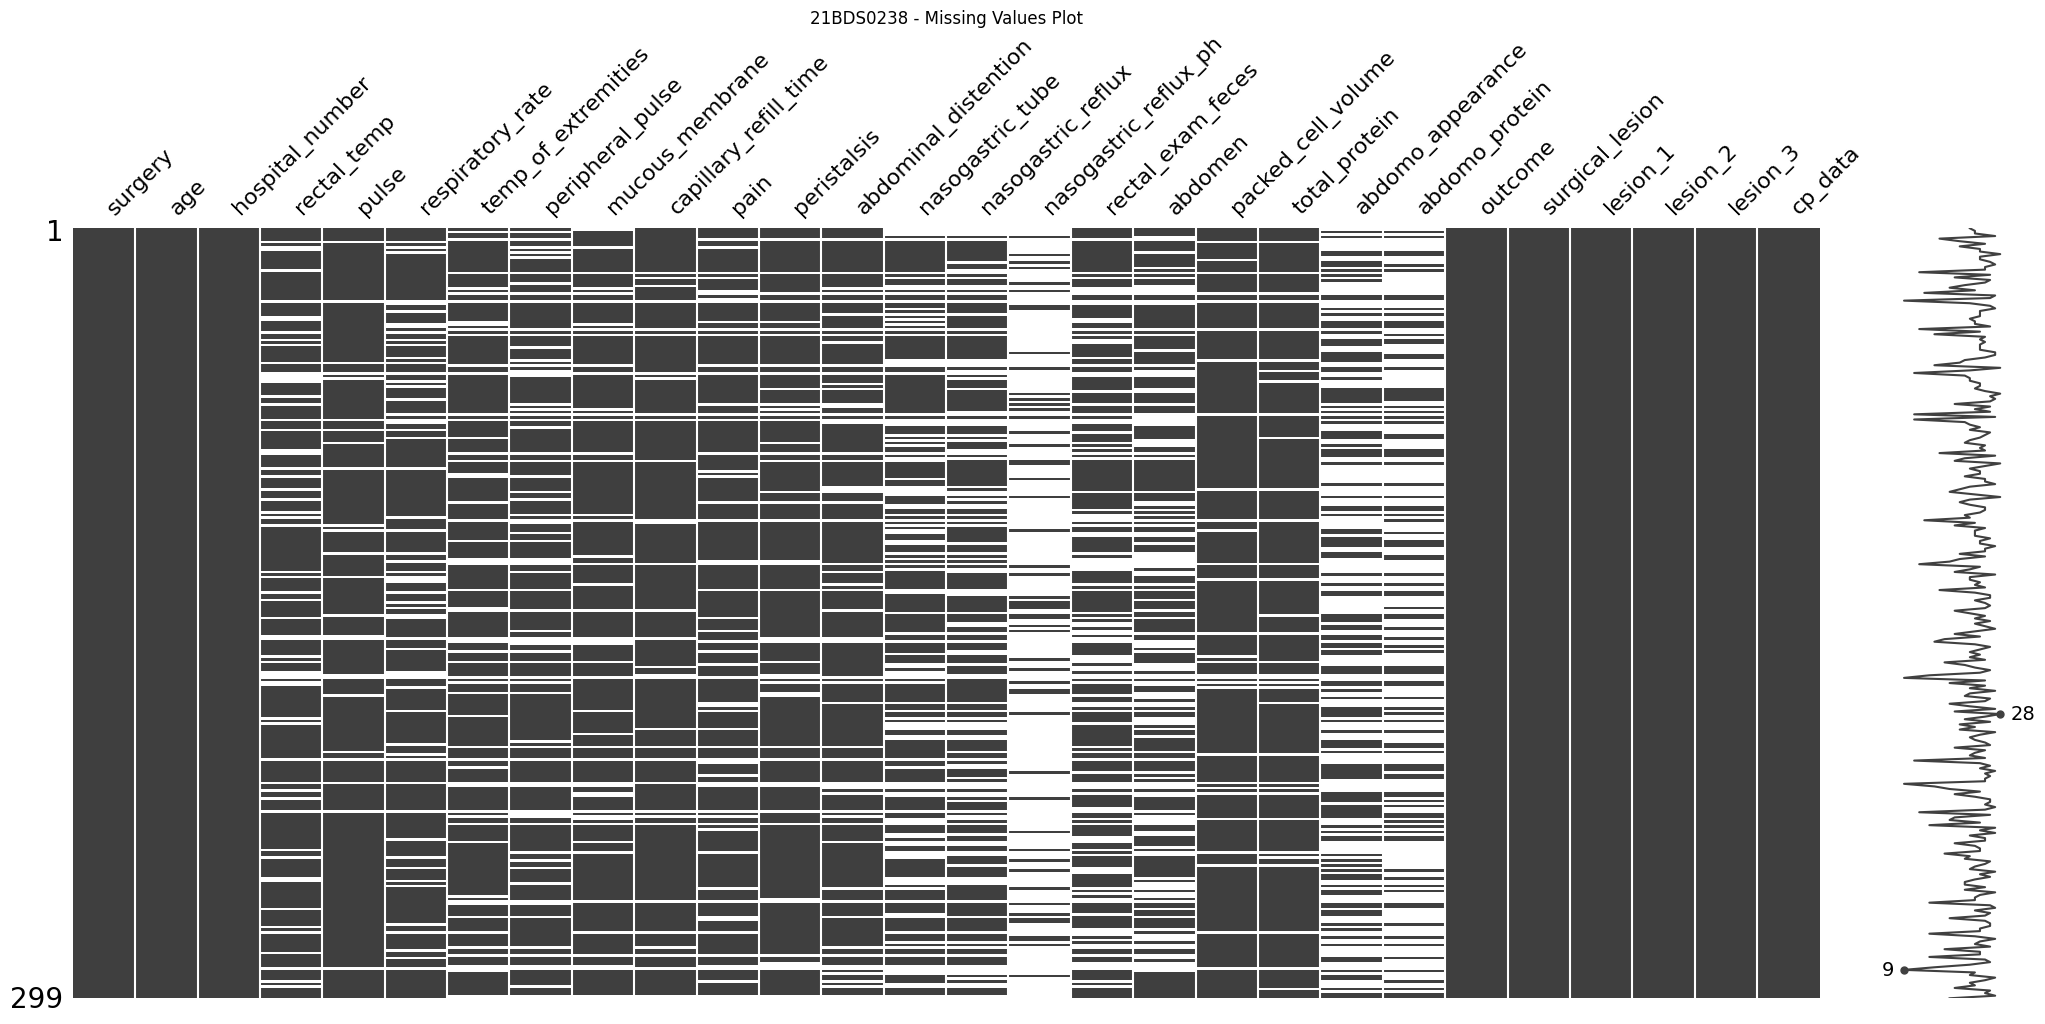


9. Original shape: (299, 28), After row-wise deletion: (6, 28)

Dataset exploration:
Number of rows and columns: (299, 28)
Column names: ['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein', 'abdomo_appearance', 'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3', 'cp_data']

Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   re

In [32]:
if 'rectal_temp' in df.columns and 'pulse' in df.columns:
    complete_vals = df[['rectal_temp', 'pulse']].notna().sum()
    print("\n6. Complete values in rectal_temp and pulse:")
    print(complete_vals)

# Missing values proportion
print("\n7. Missing values proportion:")
print(df.isna().mean())

# Missing values plot
print("\n8. Missing values plot:")
msno.matrix(df)
plt.title("21BDS0238 - Missing Values Plot")
plt.show()

# Row-wise deletion
df_clean = df.dropna()
print(f"\n9. Original shape: {df.shape}, After row-wise deletion: {df_clean.shape}")

# Basic dataset exploration
print("\nDataset exploration:")
print(f"Number of rows and columns: {df.shape}")
print(f"Column names: {df.columns.tolist()}")
print("\nDataset structure:")
print(df.info())
print("\nFirst 3 rows:")
print(df.head(3))
print("\nLast 3 rows:")
print(df.tail(3))



In [33]:
# Data Cleaning
# Convert non-numeric values to NaN in specified columns
numeric_cols = ['rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Set missing values to mean for numeric columns
for col in numeric_cols:
    if col in df.columns:
        df[col].fillna(df[col].mean(), inplace=True)



In [34]:
# Measures of central tendency and dispersion
if 'rectal_temp' in df.columns:
    print("\nMeasures for rectal_temp:")
    print(f"Mean: {df['rectal_temp'].mean()}")
    print(f"Median: {df['rectal_temp'].median()}")
    print(f"Mode: {df['rectal_temp'].mode()[0]}")
    print(f"Standard Deviation: {df['rectal_temp'].std()}")
    print(f"Variance: {df['rectal_temp'].var()}")
    print(f"Quartiles:\n{df['rectal_temp'].quantile([0.25, 0.5, 0.75])}")
    print(f"IQR: {df['rectal_temp'].quantile(0.75) - df['rectal_temp'].quantile(0.25)}")

# Correlation
if 'rectal_temp' in df.columns and 'pulse' in df.columns:
    print("\nCorrelation between rectal_temp and pulse:")
    print(df[['rectal_temp', 'pulse']].corr())




Measures for rectal_temp:
Mean: 38.16861924686192
Median: 38.16861924686192
Mode: 38.16861924686192
Standard Deviation: 0.6557301487845806
Variance: 0.42998202802504815
Quartiles:
0.25    37.900000
0.50    38.168619
0.75    38.500000
Name: rectal_temp, dtype: float64
IQR: 0.6000000000000014

Correlation between rectal_temp and pulse:
             rectal_temp     pulse
rectal_temp     1.000000  0.201133
pulse           0.201133  1.000000


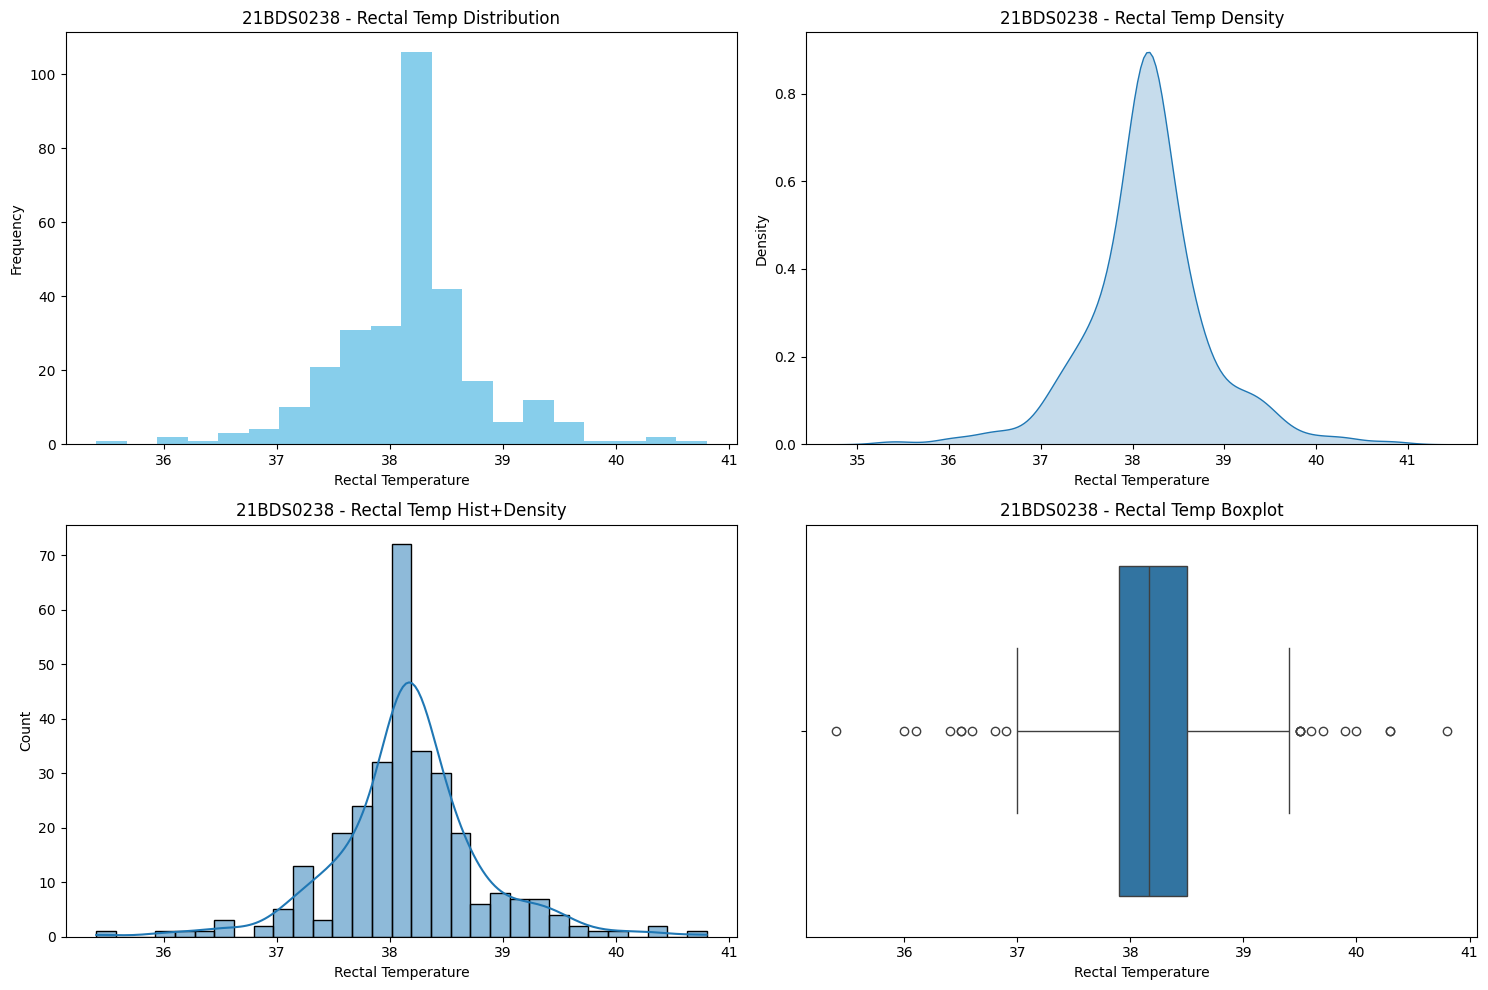

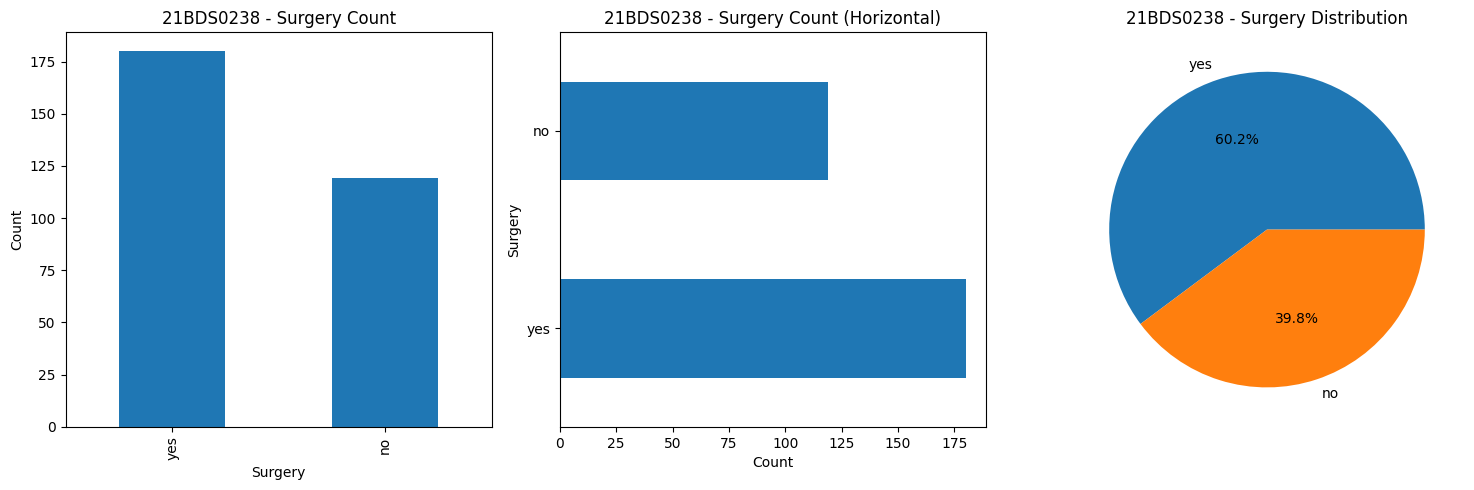

In [35]:
# Univariate Analysis
plt.figure(figsize=(15, 10))

if 'rectal_temp' in df.columns:
    # Histogram
    plt.subplot(2, 2, 1)
    plt.hist(df['rectal_temp'].dropna(), bins=20, color='skyblue')
    plt.title('21BDS0238 - Rectal Temp Distribution')
    plt.xlabel('Rectal Temperature')
    plt.ylabel('Frequency')

    # Density plot
    plt.subplot(2, 2, 2)
    sns.kdeplot(df['rectal_temp'].dropna(), shade=True)
    plt.title('21BDS0238 - Rectal Temp Density')
    plt.xlabel('Rectal Temperature')

    # Histogram with density
    plt.subplot(2, 2, 3)
    sns.histplot(df['rectal_temp'].dropna(), kde=True)
    plt.title('21BDS0238 - Rectal Temp Hist+Density')
    plt.xlabel('Rectal Temperature')

    # Boxplot
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df['rectal_temp'].dropna())
    plt.title('21BDS0238 - Rectal Temp Boxplot')
    plt.xlabel('Rectal Temperature')

plt.tight_layout()
plt.show()

# Categorical plots
if 'surgery' in df.columns:
    plt.figure(figsize=(15, 5))

    # Bar plot
    plt.subplot(1, 3, 1)
    df['surgery'].value_counts().plot(kind='bar')
    plt.title('21BDS0238 - Surgery Count')
    plt.xlabel('Surgery')
    plt.ylabel('Count')

    # Horizontal bar plot
    plt.subplot(1, 3, 2)
    df['surgery'].value_counts().plot(kind='barh')
    plt.title('21BDS0238 - Surgery Count (Horizontal)')
    plt.ylabel('Surgery')
    plt.xlabel('Count')

    # Pie chart
    plt.subplot(1, 3, 3)
    df['surgery'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('21BDS0238 - Surgery Distribution')
    plt.ylabel('')

plt.tight_layout()
plt.show()



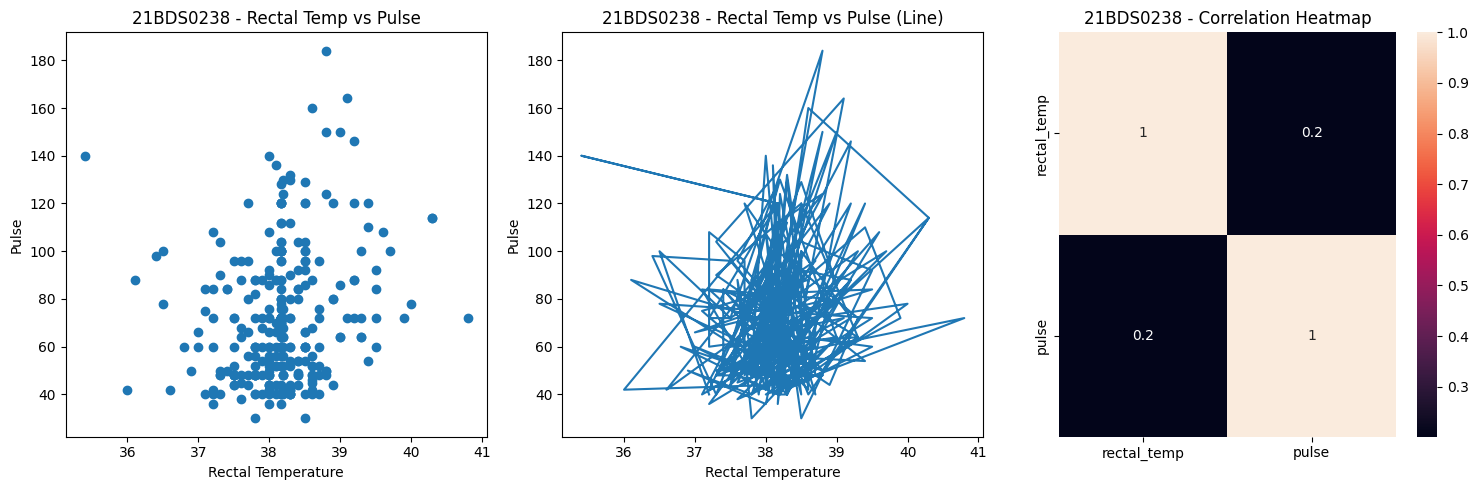

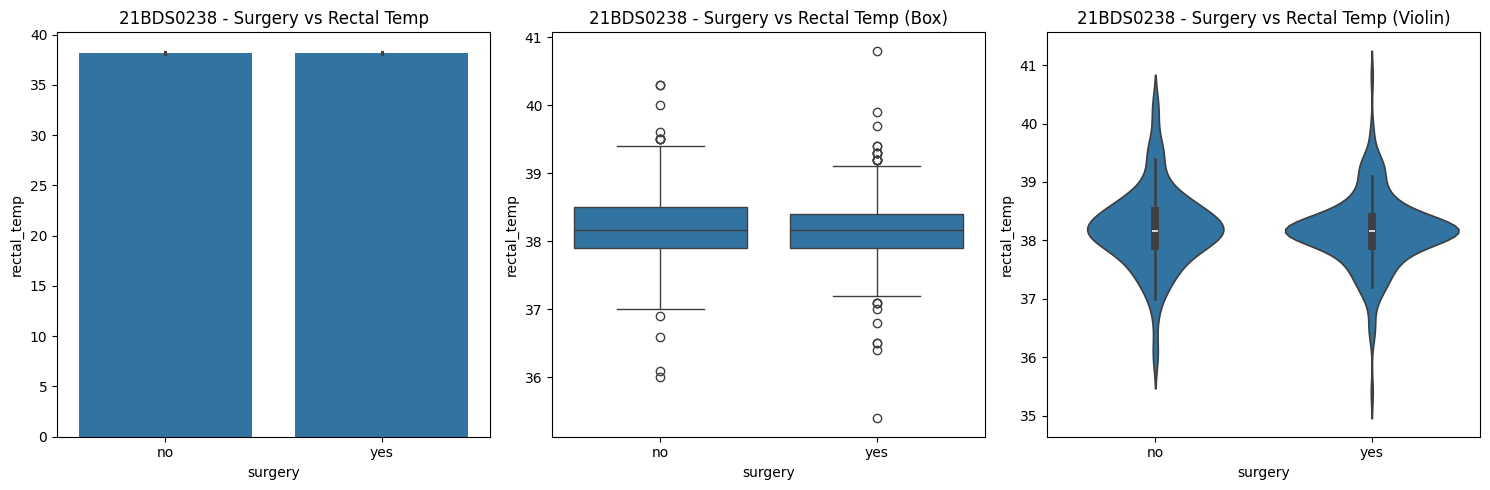

In [36]:
# Bivariate Analysis
if 'rectal_temp' in df.columns and 'pulse' in df.columns:
    plt.figure(figsize=(15, 5))

    # Scatter plot
    plt.subplot(1, 3, 1)
    plt.scatter(df['rectal_temp'], df['pulse'])
    plt.title('21BDS0238 - Rectal Temp vs Pulse')
    plt.xlabel('Rectal Temperature')
    plt.ylabel('Pulse')

    # Line plot
    plt.subplot(1, 3, 2)
    plt.plot(df['rectal_temp'], df['pulse'])
    plt.title('21BDS0238 - Rectal Temp vs Pulse (Line)')
    plt.xlabel('Rectal Temperature')
    plt.ylabel('Pulse')

    # Heatmap
    plt.subplot(1, 3, 3)
    sns.heatmap(df[['rectal_temp', 'pulse']].corr(), annot=True)
    plt.title('21BDS0238 - Correlation Heatmap')

plt.tight_layout()
plt.show()

# Categorical vs Quantitative
if 'surgery' in df.columns and 'rectal_temp' in df.columns:
    plt.figure(figsize=(15, 5))

    # Bar chart
    plt.subplot(1, 3, 1)
    sns.barplot(x='surgery', y='rectal_temp', data=df)
    plt.title('21BDS0238 - Surgery vs Rectal Temp')

    # Box plot
    plt.subplot(1, 3, 2)
    sns.boxplot(x='surgery', y='rectal_temp', data=df)
    plt.title('21BDS0238 - Surgery vs Rectal Temp (Box)')

    # Violin plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x='surgery', y='rectal_temp', data=df)
    plt.title('21BDS0238 - Surgery vs Rectal Temp (Violin)')

plt.tight_layout()
plt.show()



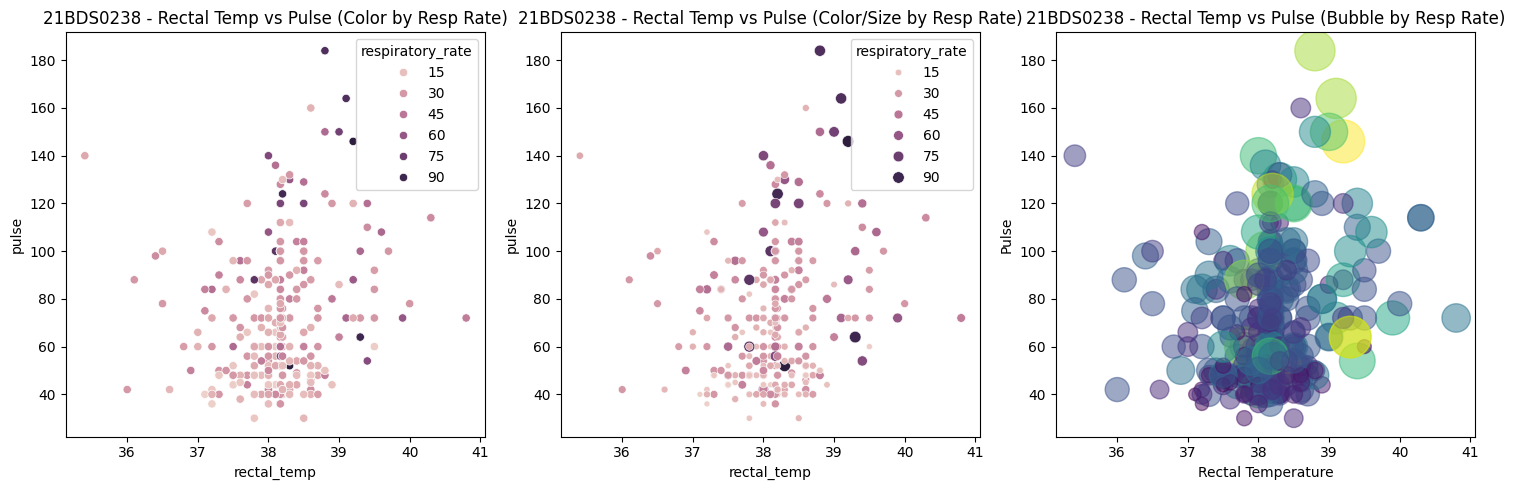

In [37]:
# Multivariate Analysis
if 'rectal_temp' in df.columns and 'pulse' in df.columns and 'respiratory_rate' in df.columns:
    # Scatter with color
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    sns.scatterplot(x='rectal_temp', y='pulse', hue='respiratory_rate', data=df)
    plt.title('21BDS0238 - Rectal Temp vs Pulse (Color by Resp Rate)')

    # Scatter with color and size
    plt.subplot(1, 3, 2)
    sns.scatterplot(x='rectal_temp', y='pulse', hue='respiratory_rate', size='respiratory_rate', data=df)
    plt.title('21BDS0238 - Rectal Temp vs Pulse (Color/Size by Resp Rate)')

    # Bubble plot
    plt.subplot(1, 3, 3)
    plt.scatter(x='rectal_temp', y='pulse', s=df['respiratory_rate']*10, c=df['respiratory_rate'], alpha=0.5, data=df)
    plt.title('21BDS0238 - Rectal Temp vs Pulse (Bubble by Resp Rate)')
    plt.xlabel('Rectal Temperature')
    plt.ylabel('Pulse')

plt.tight_layout()
plt.show()



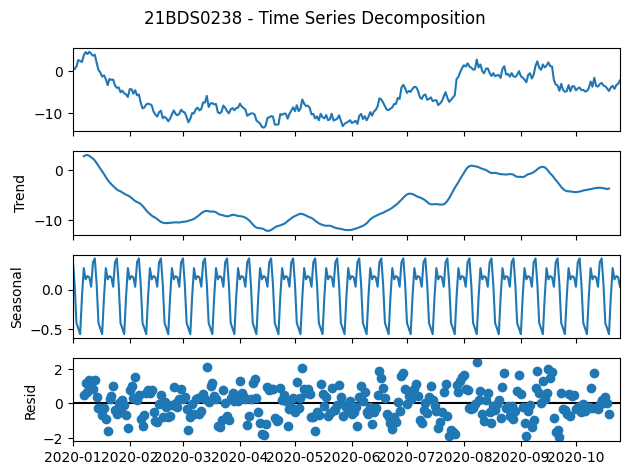

In [38]:
# Time Series Analysis (simulated since horse.csv doesn't have time series data)
dates = pd.date_range(start='1/1/2020', periods=len(df))
ts_data = pd.Series(np.random.randn(len(df)), index=dates)
ts_data = ts_data.cumsum()
# Decomposition
result = seasonal_decompose(ts_data, model='additive', period=12)
result.plot()
plt.suptitle('21BDS0238 - Time Series Decomposition')
plt.tight_layout()
plt.show()

In [39]:
# Clustering
# Prepare data for clustering
cluster_cols = ['rectal_temp', 'pulse', 'respiratory_rate']
cluster_df = df[cluster_cols].dropna()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_df)


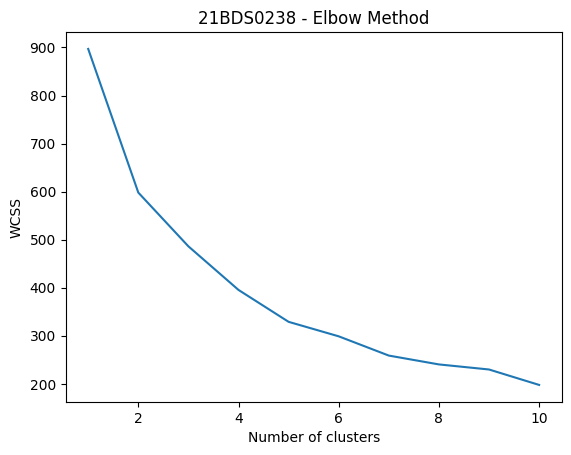

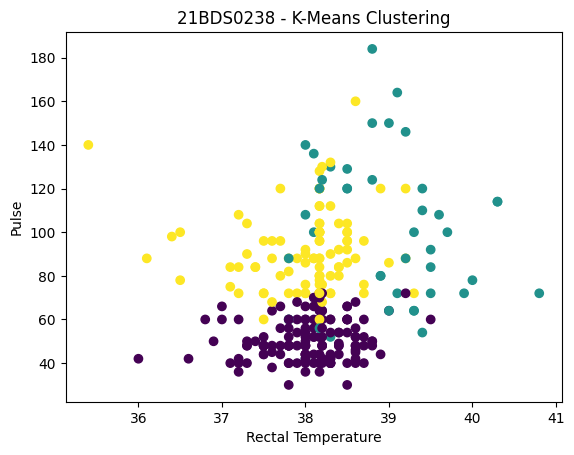

In [40]:

# K-Means Clustering
# Elbow method to find optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('21BDS0238 - Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means with optimal clusters (assuming 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add clusters to dataframe
cluster_df['Cluster'] = clusters

# Plot clusters
plt.scatter(cluster_df['rectal_temp'], cluster_df['pulse'], c=cluster_df['Cluster'])
plt.title('21BDS0238 - K-Means Clustering')
plt.xlabel('Rectal Temperature')
plt.ylabel('Pulse')
plt.show()


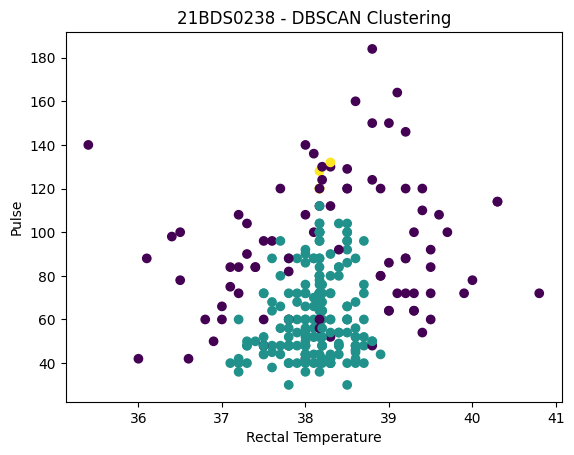

In [41]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(scaled_data)

# Add DBSCAN clusters to dataframe
cluster_df['DBSCAN_Cluster'] = dbscan_clusters

# Plot DBSCAN clusters
plt.scatter(cluster_df['rectal_temp'], cluster_df['pulse'], c=cluster_df['DBSCAN_Cluster'])
plt.title('21BDS0238 - DBSCAN Clustering')
plt.xlabel('Rectal Temperature')
plt.ylabel('Pulse')
plt.show()



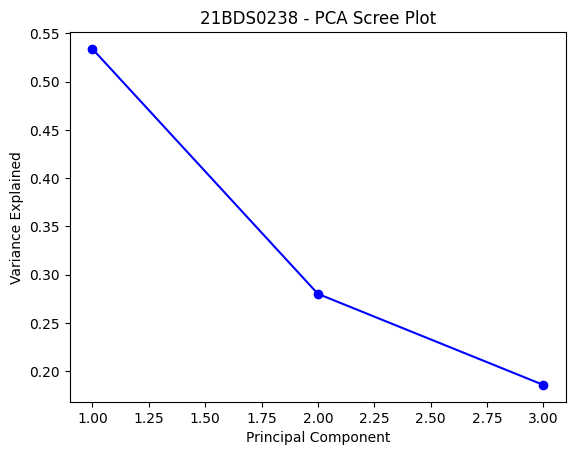

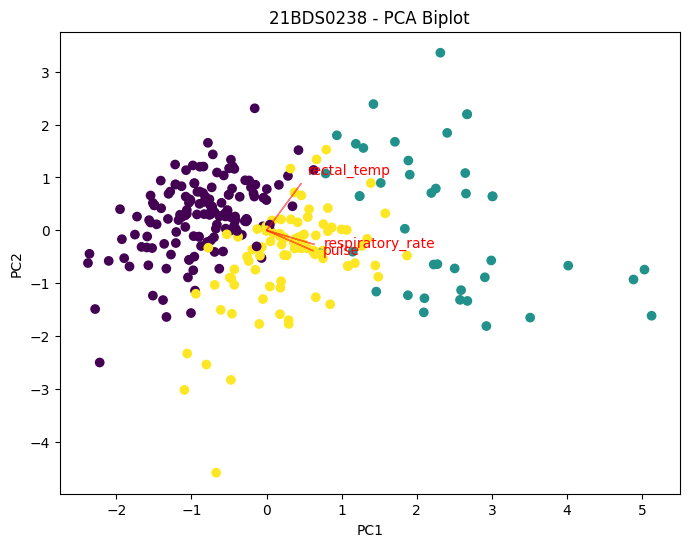

In [42]:
# PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 'bo-')
plt.title('21BDS0238 - PCA Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# Biplot
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters)
for i, feature in enumerate(cluster_cols):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
    plt.text(pca.components_[0, i]*1.2, pca.components_[1, i]*1.2, feature, color='r')
plt.title('21BDS0238 - PCA Biplot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


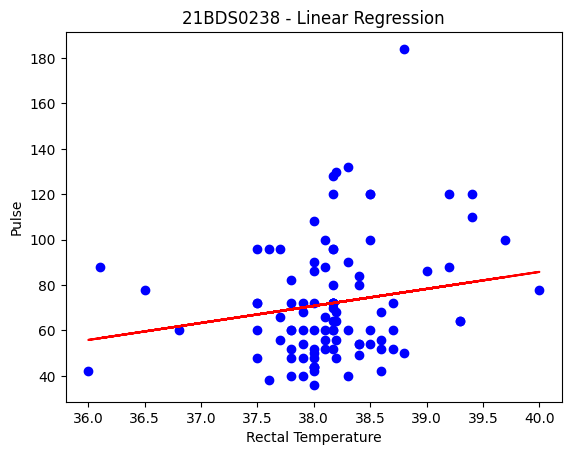


Regression Coefficients:
Intercept: -213.90840059590047
Slope: 7.49227672914945
R-squared: 0.05782455394123798
MSE: 629.6906210182565


In [43]:

# Linear Regression
if 'rectal_temp' in df.columns and 'pulse' in df.columns:
    X = df[['rectal_temp']].values
    y = df['pulse'].values

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    # Fit model
    reg = LinearRegression()
    reg.fit(X_train, y_train)

    # Predictions
    y_pred = reg.predict(X_test)

    # Plot
    plt.scatter(X_test, y_test, color='blue')
    plt.plot(X_test, y_pred, color='red')
    plt.title('21BDS0238 - Linear Regression')
    plt.xlabel('Rectal Temperature')
    plt.ylabel('Pulse')
    plt.show()

    # Print coefficients
    print(f"\nRegression Coefficients:")
    print(f"Intercept: {reg.intercept_}")
    print(f"Slope: {reg.coef_[0]}")
    print(f"R-squared: {reg.score(X_test, y_test)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")




Multiple Regression Coefficients:
Intercept: -58.961922463788994
Slopes: [2.77246018 0.83589165]
R-squared: 0.13024034411728025
MSE: 581.2924759825008


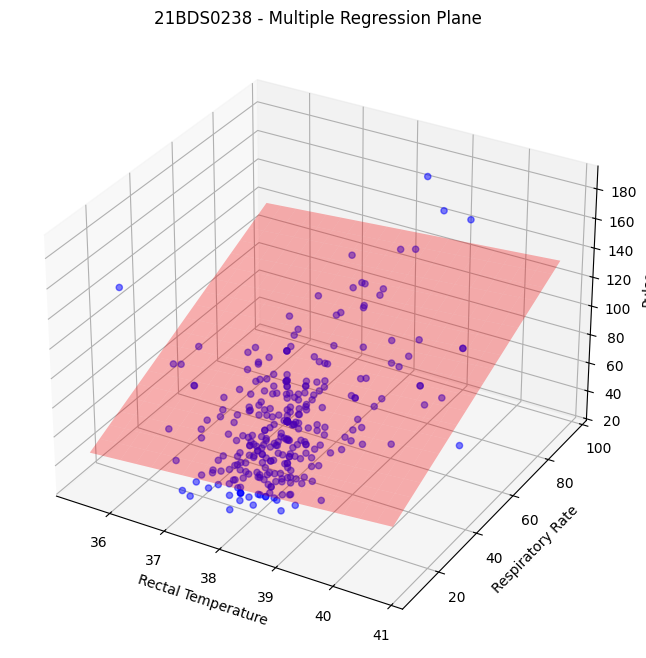

In [44]:
# Multiple Linear Regression
if 'rectal_temp' in df.columns and 'pulse' in df.columns and 'respiratory_rate' in df.columns:
    X = df[['rectal_temp', 'respiratory_rate']].values
    y = df['pulse'].values

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    # Fit model
    reg_multi = LinearRegression()
    reg_multi.fit(X_train, y_train)

    # Predictions
    y_pred_multi = reg_multi.predict(X_test)

    # Print coefficients
    print(f"\nMultiple Regression Coefficients:")
    print(f"Intercept: {reg_multi.intercept_}")
    print(f"Slopes: {reg_multi.coef_}")
    print(f"R-squared: {reg_multi.score(X_test, y_test)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred_multi)}")

# Create a 3D plot for multiple regression (if all columns exist)
if 'rectal_temp' in df.columns and 'pulse' in df.columns and 'respiratory_rate' in df.columns:
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot actual values
    ax.scatter(df['rectal_temp'], df['respiratory_rate'], df['pulse'], c='blue', marker='o', alpha=0.5)

    # Create meshgrid for regression plane
    x_surf = np.linspace(df['rectal_temp'].min(), df['rectal_temp'].max(), 20)
    y_surf = np.linspace(df['respiratory_rate'].min(), df['respiratory_rate'].max(), 20)
    x_surf, y_surf = np.meshgrid(x_surf, y_surf)

    # Calculate predicted values for plane
    z = reg_multi.intercept_ + reg_multi.coef_[0] * x_surf + reg_multi.coef_[1] * y_surf

    # Plot regression plane
    ax.plot_surface(x_surf, y_surf, z, color='red', alpha=0.3)

    ax.set_xlabel('Rectal Temperature')
    ax.set_ylabel('Respiratory Rate')
    ax.set_zlabel('Pulse')
    plt.title('21BDS0238 - Multiple Regression Plane')
    plt.show()


Evaluation Metrics for Simple Linear Regression (Rectal Temp vs Pulse):
1. Mean Absolute Error (MAE): 19.4330
2. Mean Squared Error (MSE): 629.6906
3. Root Mean Squared Error (RMSE): 25.0936
4. R-squared (R²) Score: 0.0578
5. Adjusted R-squared: 0.0481

Evaluation Metrics for Multiple Linear Regression (Rectal Temp + Resp Rate vs Pulse):
1. Mean Absolute Error (MAE): 18.4177
2. Mean Squared Error (MSE): 581.2925
3. Root Mean Squared Error (RMSE): 24.1100
4. R-squared (R²) Score: 0.1302
5. Adjusted R-squared: 0.1121


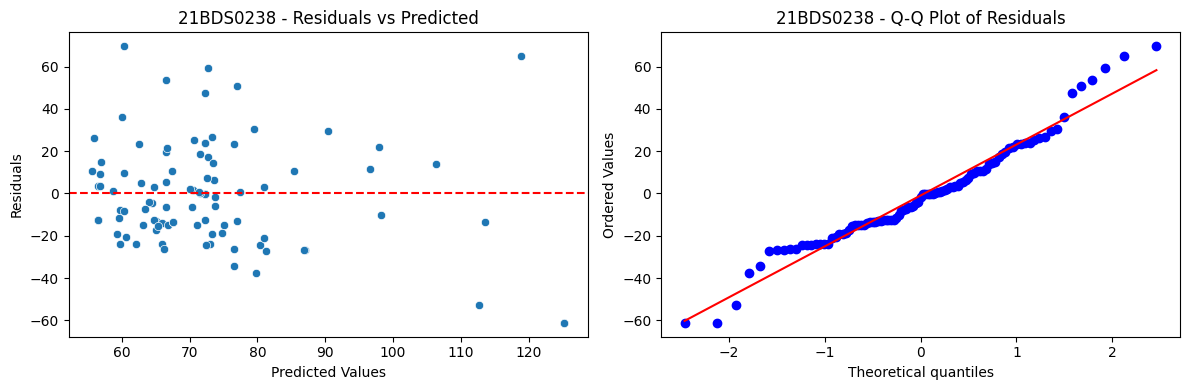

In [45]:
# Regression Model Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

def evaluate_regression(y_true, y_pred, model_name="", num_features=1):
    """Prints comprehensive regression evaluation metrics"""
    print(f"\nEvaluation Metrics for {model_name}:")
    print(f"1. Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"2. Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred):.4f}")
    print(f"3. Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"4. R-squared (R²) Score: {r2_score(y_true, y_pred):.4f}")

    # Calculate adjusted R-squared
    n = len(y_true)  # Number of samples
    adj_r2 = 1 - (1 - r2_score(y_true, y_pred)) * (n - 1) / (n - num_features - 1)
    print(f"5. Adjusted R-squared: {adj_r2:.4f}")

# Evaluate Simple Linear Regression
if 'rectal_temp' in df.columns and 'pulse' in df.columns and 'y_test' in locals():
    evaluate_regression(y_test, y_pred, "Simple Linear Regression (Rectal Temp vs Pulse)", num_features=1)

# Evaluate Multiple Linear Regression
if 'rectal_temp' in df.columns and 'pulse' in df.columns and 'respiratory_rate' in df.columns and 'y_test' in locals():
    evaluate_regression(y_test, y_pred_multi, "Multiple Linear Regression (Rectal Temp + Resp Rate vs Pulse)", num_features=2)

    # Residual Analysis
    residuals = y_test - y_pred_multi
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_pred_multi, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('21BDS0238 - Residuals vs Predicted')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

    plt.subplot(1, 2, 2)
    stats.probplot(residuals, plot=plt)
    plt.title('21BDS0238 - Q-Q Plot of Residuals')

    plt.tight_layout()
    plt.show()